<a href="https://colab.research.google.com/github/MayBornWitIt/sales-predictions/blob/main/Copy_of_C_Drive_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Grocery Sales Predictions**
- Maybelline Monge

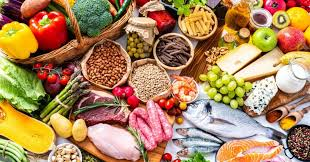


## Loading Data

In [1]:
# Mount drive to load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Data
# load csv from url, display info, and preview rows 
df = pd.read_csv('/content/drive/MyDrive/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Check columns, rows, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

In [5]:
# 1) How many rows and columns?
df.shape

(8523, 12)

In [6]:
# 2) What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# 3) Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

0

In [8]:
# 4) Identify missing values.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Identifying percentage of missing data
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [10]:
# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice). 
# Explanation: Obtain the value that is likely to be closest to the correct value given the data provided (Numerical Column)
median_i_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_i_weight, inplace = True)

In [11]:
# Explanation: Replace missing values with the value 'Missing' (Categorical Column)
df['Outlet_Size'].fillna('Missing', inplace = True)

In [12]:
# 6) Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
# 7) Finding any inconsistent categories of data
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [14]:
# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.81,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [15]:
# Summary statistics of each (min, max, mean)
stats =  df.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
min,4.55500,0.000000,31.290000,1985.000000,33.290000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals


Text(0, 0.5, 'Quantity')

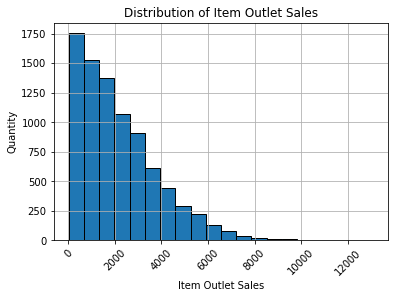

In [16]:
# Histogram to view the distributions of various features in your dataset
x1 = df['Item_Outlet_Sales'].hist(bins = 20, edgecolor = 'black')
x1.tick_params(axis='x', rotation = 45)
x1.ticklabel_format(style='plain')
x1.set_title('Distribution of Item Outlet Sales')
x1.set_xlabel('Item Outlet Sales')
x1.set_ylabel('Quantity')

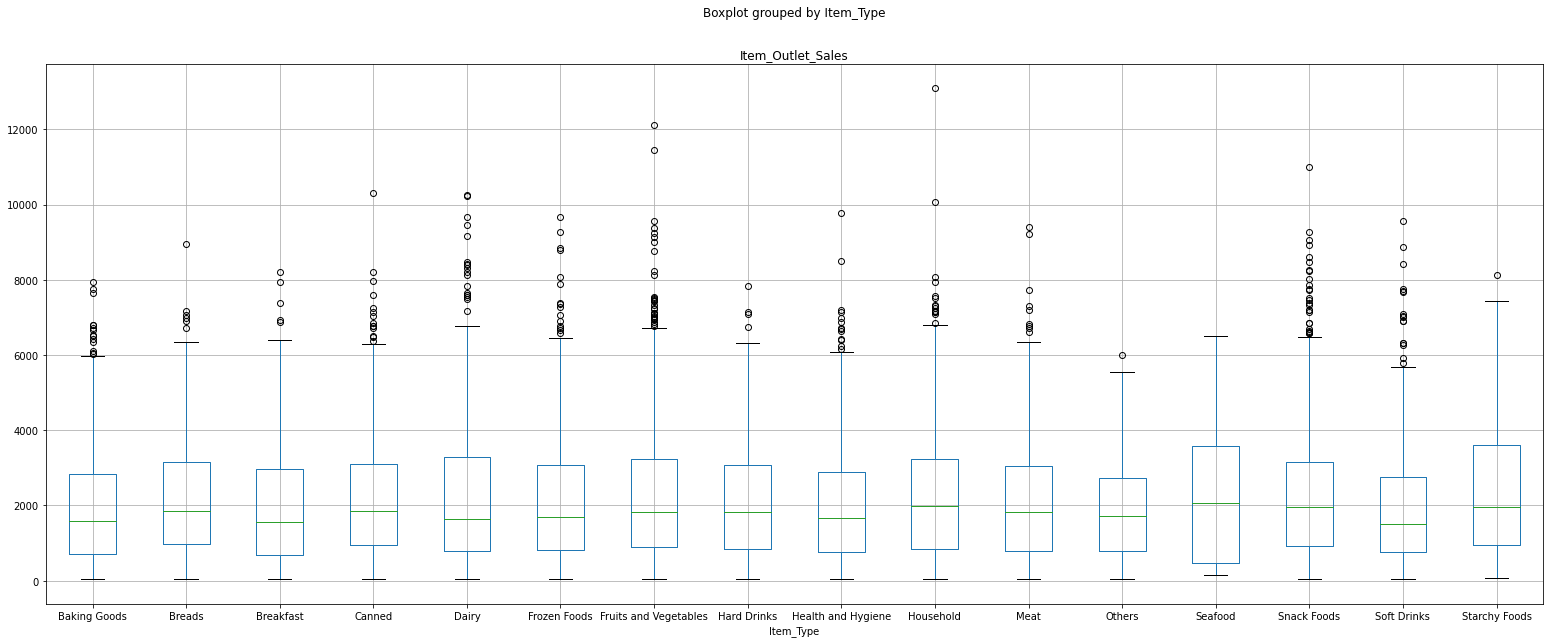

In [17]:
statistical_sum = df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Type', figsize=(26,10))

<Axes: >

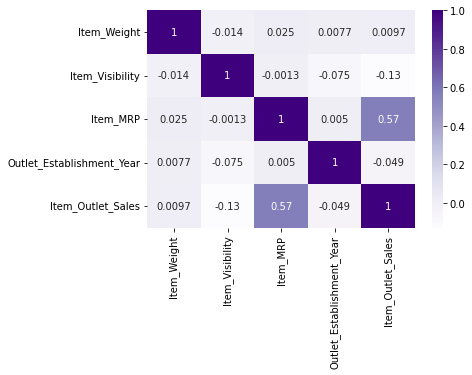

In [18]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True)

## Explanatory Visuals

<ipython-input-19-0f82ff7bf6b3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df,x='Item_Outlet_Sales', y = 'Item_Type', ci = None)


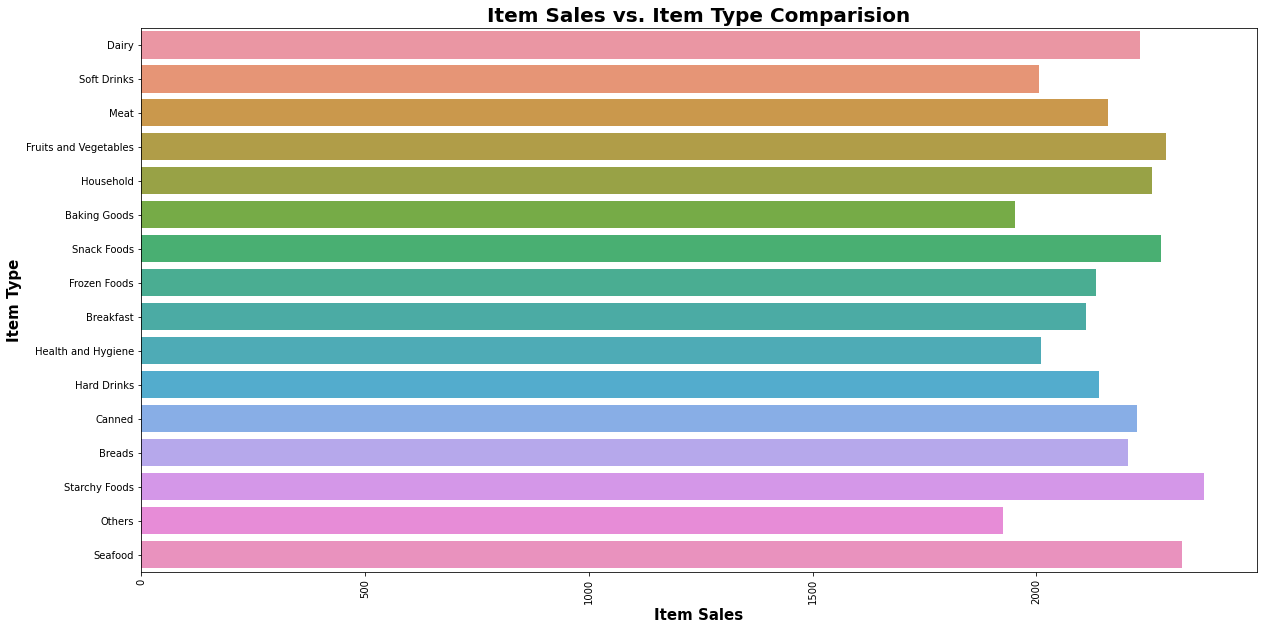

In [19]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Item_Outlet_Sales', y = 'Item_Type', ci = None)
plt.xticks(rotation = 90)
ax.set_title('Item Sales vs. Item Type Comparision', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Sales', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Type', fontsize = 15, fontweight = 'bold');

In [20]:
## Updating our function to add the median
def plot_annotated_histogram(df, col):
    ## Saving the mean of the column
    mean = df[col].mean().round(2)
    median = df[col].median().round(2)
    ## Creating the Plot
    fig,ax = plt.subplots(figsize=(10,6))
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_title(col)
    ## Annotating measures of centrality
    ax.axvline(mean, color='yellow',label=f'Mean: {mean}', lw=2);
    ax.axvline(median, color = 'orange',  label = f'Median: {median}', ls="--", lw=2)
    
    ax.legend();
    return fig, ax


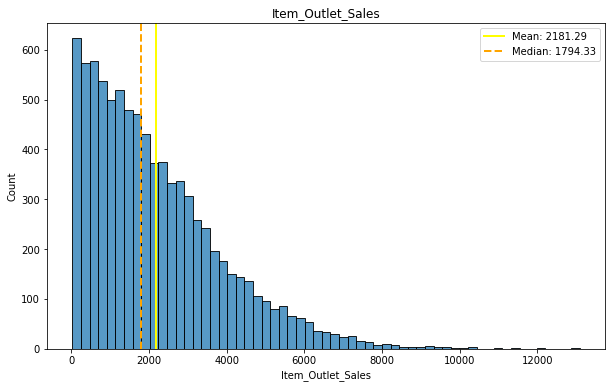

In [21]:
fig,ax = plot_annotated_histogram(df, col = 'Item_Outlet_Sales')